## Import packages

**🧩 1. Load and prepare date**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

$$
X_{scaled} = \frac{X - \bar{X}}{\sigma}
$$

$$
\sigma = \sqrt{X - \bar{X}}
$$

In [9]:
df = pd.read_csv("../data/car_price.csv")

features = ['horsepower', 'enginesize', 'curbweight', 'carwidth']
target = 'price'

df = df[features + [target]].dropna()

X = df[features].values
y = df[target].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled[:5]

array([[ 0.17448278,  0.07444893, -0.01456628, -0.84478235],
       [ 0.17448278,  0.07444893, -0.01456628, -0.84478235],
       [ 1.26453643,  0.60404617,  0.51488192, -0.19056612],
       [-0.05366798, -0.43107572, -0.42079745,  0.13654199],
       [ 0.27588312,  0.21888454,  0.51680718,  0.23000146]])

In [12]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0, ddof=1)
X2 = (X - X_mean) / X_std
X2[:5]

array([[ 0.17405669,  0.07426712, -0.01453071, -0.84271939],
       [ 0.17405669,  0.07426712, -0.01453071, -0.84271939],
       [ 1.26144842,  0.60257108,  0.51362457, -0.19010076],
       [-0.05353693, -0.43002303, -0.41976986,  0.13620856],
       [ 0.27520941,  0.21835002,  0.51554514,  0.22943979]])

**🧮 2. Cost and gradient functions**

In [11]:
def compute_cost(X, y, w, b):
    n = len(y)
    preds = X.dot(w) + b
    error = y - preds
    return (1/n) * np.sum(error ** 2)

def compute_gradients(X, y, w, b):
    n = len(y)
    preds = X.dot(w) + b
    error = y - preds
    dw = (-2/n) * X.T.dot(error)
    db = (-2/n) * np.sum(error)
    return dw, db


**🔁 3. Gradient Descent function**

In [12]:
def gradient_descent(X, y, lr=0.01, epochs=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0
    cost_history = []

    for i in range(epochs):
        dw, db = compute_gradients(X, y, w, b)
        w -= lr * dw
        b -= lr * db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Epoch {i}: Cost = {cost:.2f}")
    return w, b, cost_history


**📊 4. Train and test model**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

w, b, cost_hist = gradient_descent(X_train, y_train, lr=0.01, epochs=1000)

y_pred_train = X_train.dot(w) + b
y_pred_test = X_test.dot(w) + b

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"R² Score: {r2:.4f}")


Epoch 0: Cost = 221529743.86
Epoch 100: Cost = 13994931.48
Epoch 200: Cost = 10965870.00
Epoch 300: Cost = 10857693.29
Epoch 400: Cost = 10828817.25
Epoch 500: Cost = 10813519.47
Epoch 600: Cost = 10804682.84
Epoch 700: Cost = 10799406.89
Epoch 800: Cost = 10796188.44
Epoch 900: Cost = 10794193.54
Train MSE: 10792951.57
Test MSE: 14234181.39
R² Score: 0.8197


**📈 5. Visualisations**

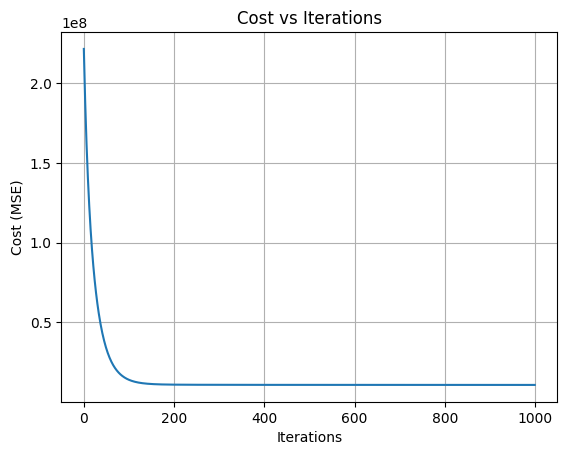

In [14]:
plt.plot(cost_hist)
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

**📈 Real vs predict prices**

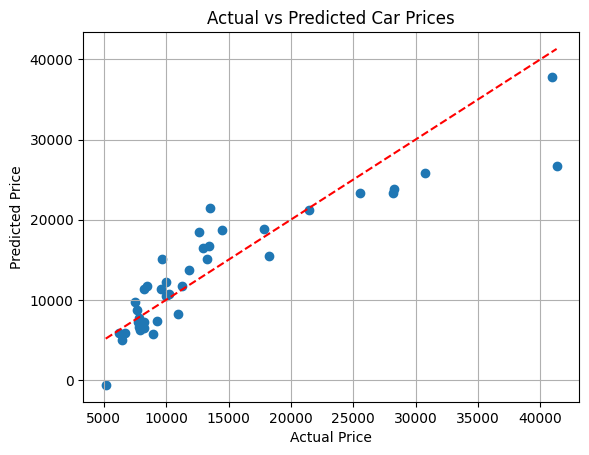

In [15]:
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()


**✅ Bonus: compare with Sklearn**

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_sklearn = model.predict(X_test)

print("Sklearn MSE:", mean_squared_error(y_test, y_sklearn))
print("Sklearn R²:", r2_score(y_test, y_sklearn))

Sklearn MSE: 14203294.999366624
Sklearn R²: 0.8200839678407293
